Environment ready. Results will be saved to: /content/results
Loaded dataset with shape: (9994, 21)
Dropped columns: ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID']
Remaining columns: ['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']
Dropped 1 duplicate rows
Sample rows after merging monthly_avg_sales:


,Order Date,month,Sales,monthly_avg_sales,is_holiday_spike
0,2016-11-08,11,261.9600,239.606438,1
1,2016-11-08,11,731.9400,239.606438,1
2,2016-06-12,6,14.6200,212.996763,0
3,2015-10-11,10,957.5775,244.594609,0
4,2015-10-11,10,22.3680,244.594609,0


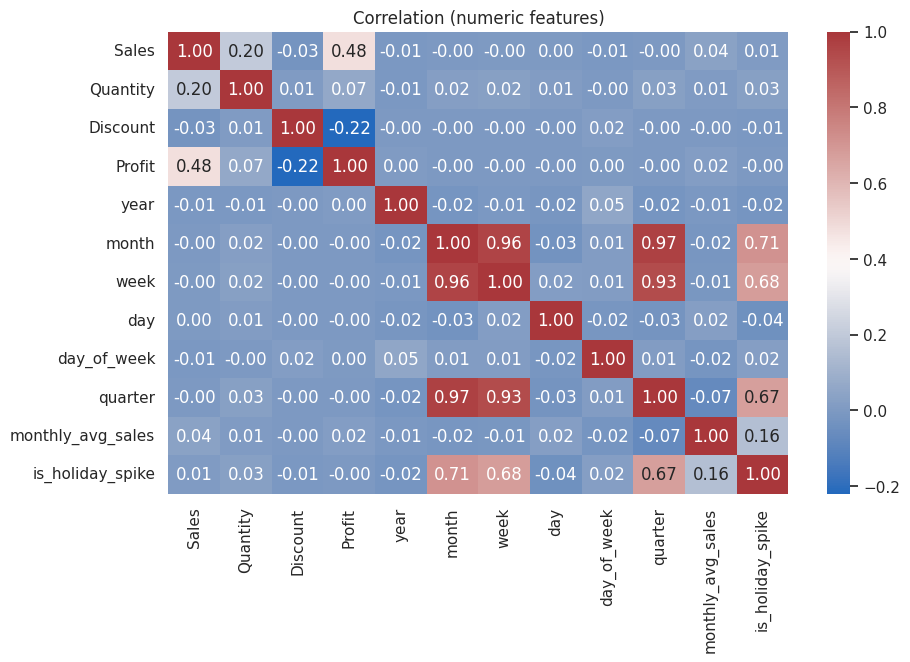

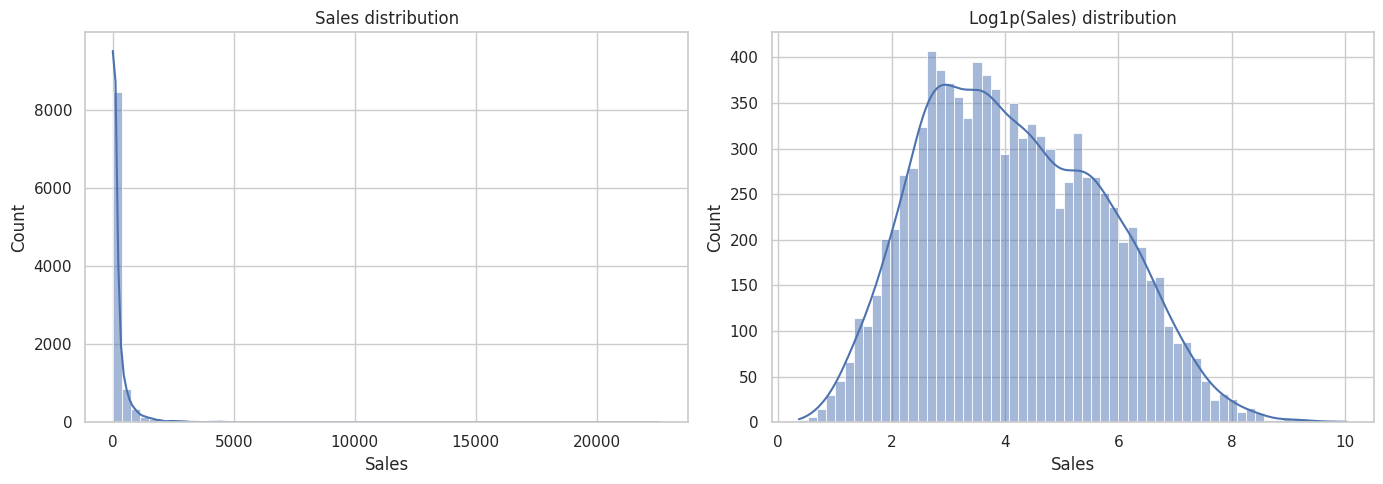

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsc5h6zk/5wepo66y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsc5h6zk/0szesisy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71507', 'data', 'file=/tmp/tmpgsc5h6zk/5wepo66y.json', 'init=/tmp/tmpgsc5h6zk/0szesisy.json', 'output', 'file=/tmp/tmpgsc5h6zk/prophet_modelq_nzosuw/prophet_model-20251007140410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Daily sales rows: 1237
Columns used for modeling: ['ds', 'y', 'quarter', 'monthly_avg_sales', 'is_holiday_spike']
          ds         y  quarter  monthly_avg_sales  is_holiday_spike
0 2014-01-03    16.448        1          249.14655                 0
1 2014-01-04   288.060        1          249.14655                 0
2 2014-01-05    19.536        1          249.14655                 0
3 2014-01-06  4407.100        1          249.14655                 0
4 2014-01-07    87.158        1          249.14655                 0
Training rows (after dropping regressor NaNs): 1237


14:04:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model fitted successfully.
Forecast produced. Forecast rows: 1417


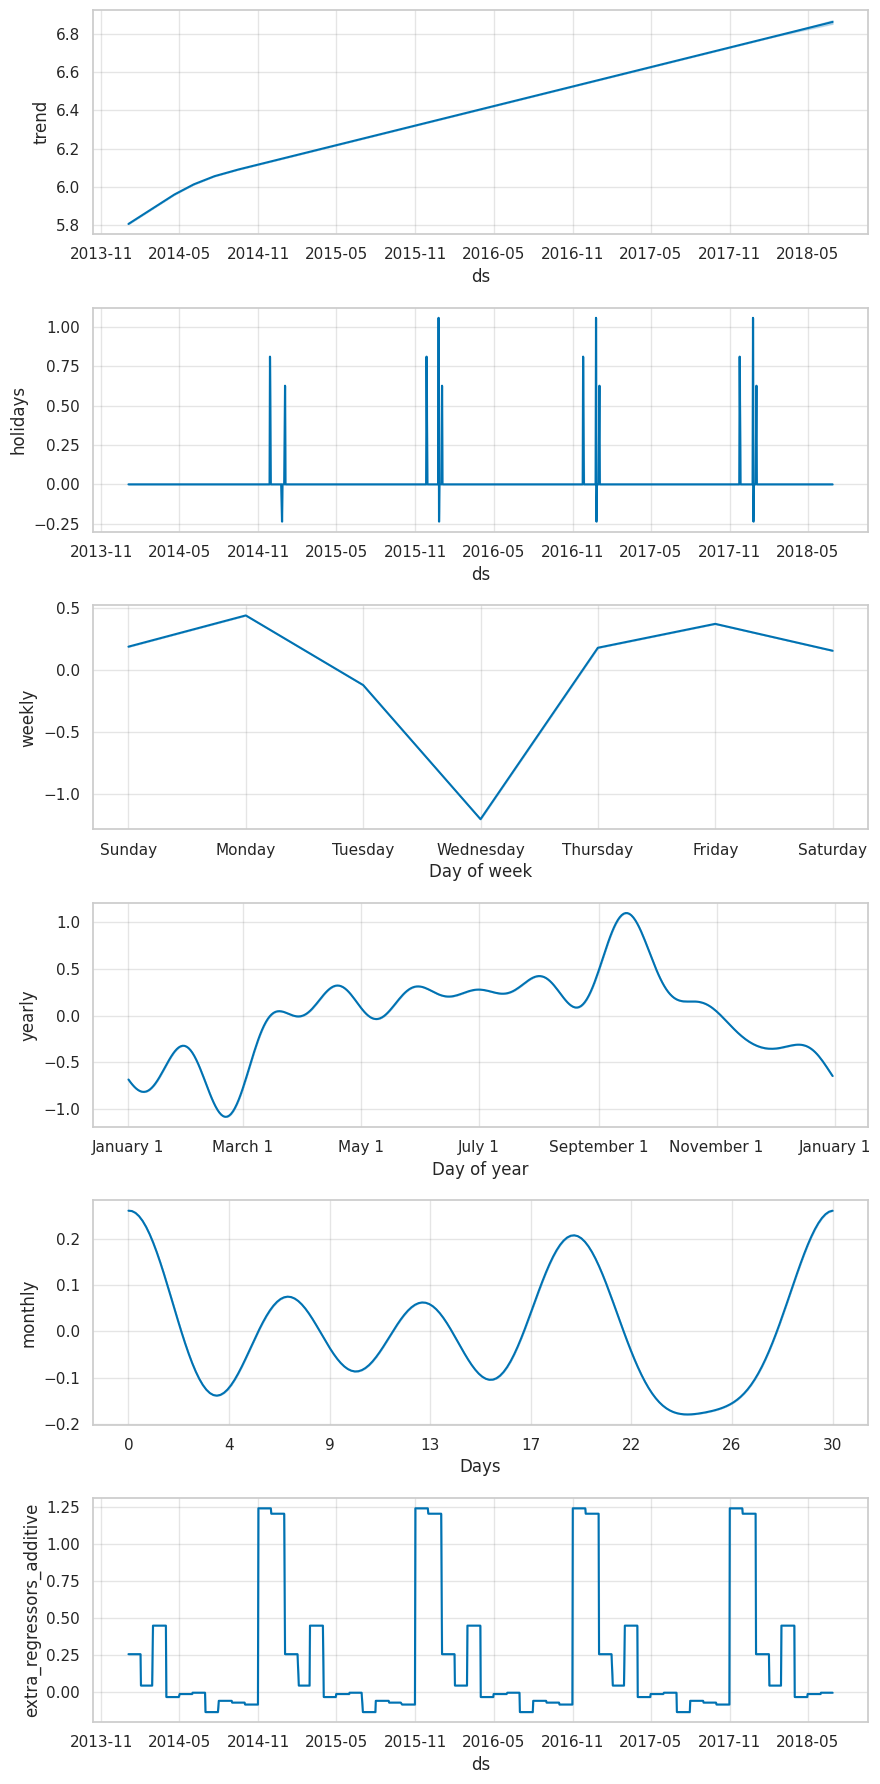

INFO:prophet:Making 4 forecasts with cutoffs between 2016-04-09 00:00:00 and 2017-10-01 00:00:00


MAE: 1272.44 | RMSE: 2277.19 | MAPE: 320.43%
Saved forecast_metrics.csv
Saved historical_and_forecast_sales.csv
Saved future_forecasted_sales.csv
Saved historical_daily_sales.csv
All outputs saved in folder: /content/results
Starting cross-validation (this may take several minutes)...


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsc5h6zk/8pt8vnc8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsc5h6zk/8r3j_9rr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88459', 'data', 'file=/tmp/tmpgsc5h6zk/8pt8vnc8.json', 'init=/tmp/tmpgsc5h6zk/8r3j_9rr.json', 'output', 'file=/tmp/tmpgsc5h6zk/prophet_model5io46odm/prophet_model-20251007140412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:04:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:04:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsc5h6zk/ke8qj6cq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgsc5h6zk/fco0urbq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  9 days  2.114950  1.454287  1.101936  0.240981  0.106677  0.186116   
1 10 days  2.158854  1.469304  1.137630  0.248287  0.118731  0.192475   
2 11 days  2.209582  1.486466  1.181418  0.246280  0.122382  0.195095   
3 12 days  2.002033  1.414932  1.146043  0.217019  0.133386  0.181394   
4 13 days  1.543679  1.242449  1.016575  0.167994  0.118731  0.154852   

   coverage  
0  0.781250  
1  0.791667  
2  0.789062  
3  0.804688  
4  0.843750  
Saved cv_performance_metrics.csv


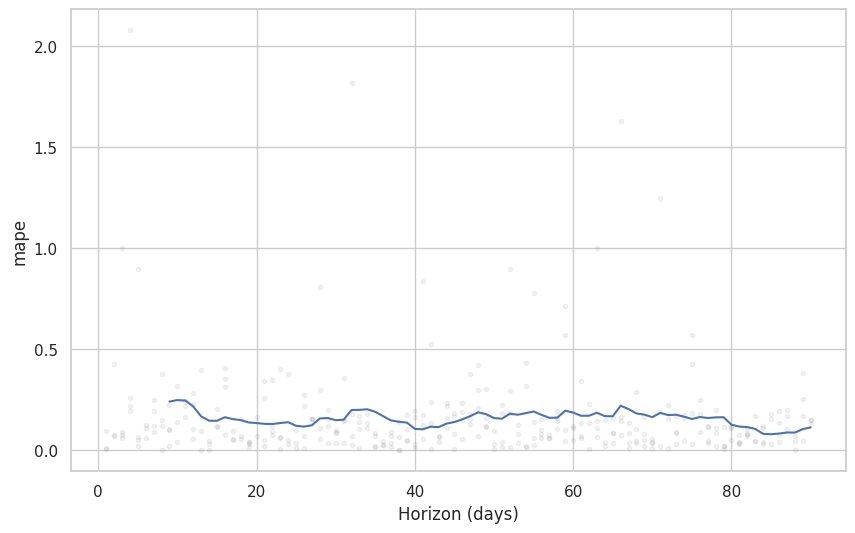

Notebook finished. Download CSVs from the Colab files pane or from: /content/results


In [5]:
# =========================
# ML_Task_1_colab_ready.py
# Colab-ready enhanced notebook/script
# =========================

# Cell 1 - Install dependencies (run in Colab)
!pip install --quiet prophet plotly

# Cell 2 - Imports & settings
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)

# Create results folder
RESULTS_DIR = "/content/results"
os.makedirs(RESULTS_DIR, exist_ok=True)

print("Environment ready. Results will be saved to:", RESULTS_DIR)


# Cell 3 - Load dataset (upload file to Colab first)
DATA_PATH = "/content/Sample - Superstore.csv"   # change if needed
df = pd.read_csv(DATA_PATH, encoding='ISO-8859-1')
print("Loaded dataset with shape:", df.shape)
df.head(3)


# Cell 4 - Basic cleaning & drop irrelevant columns
cols_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product ID']
existing_drops = [c for c in cols_to_drop if c in df.columns]
df.drop(columns=existing_drops, inplace=True)
print("Dropped columns:", existing_drops)
print("Remaining columns:", df.columns.tolist())


# Cell 5 - Datetime conversion and features
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y', errors='coerce')

# Drop rows with invalid Order Date if any
df = df.dropna(subset=['Order Date']).copy()

df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month
df['week'] = df['Order Date'].dt.isocalendar().week.astype(int)
df['day'] = df['Order Date'].dt.day
df['day_of_week'] = df['Order Date'].dt.dayofweek
df['quarter'] = df['Order Date'].dt.quarter

# remove duplicates
before = len(df)
df.drop_duplicates(inplace=True)
after = len(df)
print(f"Dropped {before-after} duplicate rows")


# Cell 6 - monthly_avg_sales creation (robust)
monthly_avg_sales = (
    df.groupby(df['Order Date'].dt.month)['Sales']
      .mean()
      .reset_index()
)
monthly_avg_sales.columns = ['month', 'monthly_avg_sales']
monthly_avg_sales.head()


# Cell 7 - Merge monthly_avg_sales into df
df = df.merge(monthly_avg_sales, on='month', how='left')
df['is_holiday_spike'] = np.where(df['Order Date'].dt.month.isin([11,12]), 1, 0)

# Quick sanity check
print("Sample rows after merging monthly_avg_sales:")
display(df[['Order Date','month','Sales','monthly_avg_sales','is_holiday_spike']].head())


# Cell 8 - EDA (compact & prettier)
# Correlation heatmap (numeric)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="vlag")
plt.title("Correlation (numeric features)")
plt.show()

# Sales distribution with log-transform view
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.histplot(df['Sales'], bins=60, kde=True, ax=ax[0])
ax[0].set_title("Sales distribution")
sns.histplot(np.log1p(df['Sales']), bins=60, kde=True, ax=ax[1])
ax[1].set_title("Log1p(Sales) distribution")
plt.tight_layout()
plt.show()

# Category sales vs profit (plotly)
cat_summary = df.groupby('Category').agg(Total_Sales=('Sales','sum'), Total_Profit=('Profit','sum')).reset_index()
fig = px.bar(cat_summary.melt(id_vars='Category'), x='Category', y='value', color='variable',
             title="Sales vs Profit by Category", barmode='group')
fig.show()


# Cell 9 - Aggregate to daily time series for Prophet
daily_sales = (
    df.groupby('Order Date')
      .agg(Sales=('Sales','sum'),
           quarter=('quarter','first'),
           month=('month','first'),
           monthly_avg_sales=('monthly_avg_sales','first'),
           is_holiday_spike=('is_holiday_spike','max'))
      .reset_index()
      .rename(columns={'Order Date':'ds','Sales':'y'})
)

daily_sales = daily_sales.sort_values('ds').reset_index(drop=True)
print("Daily sales rows:", len(daily_sales))
daily_sales.head()


# Cell 10 - Handle profit outliers (kept from original, optional)
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['Profit_clipped'] = np.where(df['Profit'] > upper_bound, upper_bound, df['Profit'])


# Cell 11 - Prepare regressors and ensure they exist before fitting
daily_sales['quarter'] = daily_sales['ds'].dt.quarter
daily_sales['month'] = daily_sales['ds'].dt.month

# make sure monthly_avg_sales exists in daily_sales - if missing, build from monthly_avg_sales created earlier
if 'monthly_avg_sales' not in daily_sales.columns or daily_sales['monthly_avg_sales'].isnull().all():
    daily_sales = daily_sales.drop(columns=['monthly_avg_sales'], errors=True)
    daily_sales = daily_sales.merge(monthly_avg_sales, on='month', how='left')

# holiday spike flag (ensure present)
daily_sales['is_holiday_spike'] = np.where(daily_sales['ds'].dt.month.isin([11,12]), 1, 0)

# sanity check
print("Columns used for modeling:", ['ds','y','quarter','monthly_avg_sales','is_holiday_spike'])
print(daily_sales[['ds','y','quarter','monthly_avg_sales','is_holiday_spike']].head())


# Cell 12 - Fit Prophet model (log transform target) & add regressors
m = Prophet(holidays=pd.DataFrame({
        'holiday': ['Black Friday']*4 + ['Christmas']*4 + ['New Year']*4,
        'ds': pd.to_datetime([
            '2014-11-28','2015-11-27','2016-11-25','2017-11-24',
            '2014-12-25','2015-12-25','2016-12-25','2017-12-25',
            '2015-01-01','2016-01-01','2017-01-01','2018-01-01'
        ]),
        'lower_window': 0,
        'upper_window': 1
    }),
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False
)

# add custom seasonality
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# add regressors (make sure these columns are present in training df)
for reg in ['quarter','monthly_avg_sales','is_holiday_spike']:
    m.add_regressor(reg)

# transform target
daily_sales['y'] = np.log1p(daily_sales['y'])

# drop rows with any NaNs in regressors (Prophet requires regressor values)
train_df = daily_sales.dropna(subset=['quarter','monthly_avg_sales','is_holiday_spike','y']).copy()
print("Training rows (after dropping regressor NaNs):", len(train_df))

m.fit(train_df)

print("Model fitted successfully.")


# Cell 13 - Forecast
periods = 180
future = m.make_future_dataframe(periods=periods)
future['quarter'] = future['ds'].dt.quarter
future['month'] = future['ds'].dt.month
future = future.merge(monthly_avg_sales, on='month', how='left')
future['is_holiday_spike'] = np.where(future['ds'].dt.month.isin([11,12]), 1, 0)

# Fill any missing monthly_avg_sales (e.g., for months outside training) with overall monthly mean
if future['monthly_avg_sales'].isnull().any():
    future['monthly_avg_sales'] = future['monthly_avg_sales'].fillna(monthly_avg_sales['monthly_avg_sales'].mean())

forecast = m.predict(future)

# inverse transform predictions (we fit on log1p)
for c in ['yhat','yhat_lower','yhat_upper']:
    # prophet returns predictions in same transform (log1p) — invert it
    forecast[c] = np.expm1(forecast[c])

# also create a clean forecast subset
# Safely select only the columns that exist
available_cols = [col for col in ['ds','yhat','yhat_lower','yhat_upper','trend','seasonal','weekly','yearly'] if col in forecast.columns]
forecast_out = forecast[available_cols].copy()


print("Forecast produced. Forecast rows:", len(forecast_out))
forecast_out.head()


# Cell 14 - Plot forecasts (plotly interactive)
# Combine historical (original scale) and forecast
hist_plot = daily_sales.copy()
hist_plot['y'] = np.expm1(hist_plot['y'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=hist_plot['ds'], y=hist_plot['y'], mode='markers', name='Actuals',
                         marker=dict(size=4, opacity=0.6)))
fig.add_trace(go.Scatter(x=forecast_out['ds'], y=forecast_out['yhat'], mode='lines', name='Forecast'))
fig.add_trace(go.Scatter(x=forecast_out['ds'], y=forecast_out['yhat_upper'], mode='lines',
                         name='Upper CI', line=dict(width=0), showlegend=False))
fig.add_trace(go.Scatter(x=forecast_out['ds'], y=forecast_out['yhat_lower'], mode='lines',
                         name='Lower CI', line=dict(width=0), showlegend=False, fill='tonexty', fillcolor='rgba(0,116,217,0.15)'))

fig.update_layout(title="Actuals vs Forecast (interactive)", xaxis_title="Date", yaxis_title="Sales")
fig.show()


# Cell 15 - Components (matplotlib fallback) & Prophet components
fig2 = m.plot_components(forecast)
plt.show()


# Cell 16 - Evaluation: merge history & forecast for overlapping dates and compute metrics
# Merge only on historical dates
hist_df = daily_sales.copy()
hist_df['y'] = np.expm1(hist_df['y'])   # convert back to original scale

# keep only ds and actual y
hist_actuals = hist_df[['ds','y']]

# use forecast for overlapping dates
preds_on_hist = forecast_out[['ds','yhat']]

df_merged = pd.merge(hist_actuals, preds_on_hist, on='ds', how='inner')
df_merged = df_merged.sort_values('ds').reset_index(drop=True)

mae = mean_absolute_error(df_merged['y'], df_merged['yhat'])
rmse = np.sqrt(mean_squared_error(df_merged['y'], df_merged['yhat']))
mape = np.mean(np.abs((df_merged['y'] - df_merged['yhat']) / df_merged['y'])) * 100

print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")
metrics_df = pd.DataFrame({"Metric": ["MAE","RMSE","MAPE"], "Value":[mae,rmse,mape]})

# Save evaluation
metrics_df.to_csv(os.path.join(RESULTS_DIR,"forecast_metrics.csv"), index=False)
print("Saved forecast_metrics.csv")


# Cell 17 - Save outputs for Power BI
# historical & forecast merged for overlapping dates
df_merged.to_csv(os.path.join(RESULTS_DIR,"historical_and_forecast_sales.csv"), index=False)
print("Saved historical_and_forecast_sales.csv")

# future-only forecasts (dates after last historical date)
last_hist = hist_actuals['ds'].max()
future_only = forecast_out[forecast_out['ds'] > last_hist][['ds','yhat','yhat_lower','yhat_upper']].copy()
future_only.to_csv(os.path.join(RESULTS_DIR,"future_forecasted_sales.csv"), index=False)
print("Saved future_forecasted_sales.csv")

# Also save full daily historical series used for modeling
hist_df.to_csv(os.path.join(RESULTS_DIR,"historical_daily_sales.csv"), index=False)
print("Saved historical_daily_sales.csv")

print("All outputs saved in folder:", RESULTS_DIR)


# Cell 18 - Optional: cross-validation (may take time) - wrapped in try-except
try:
    print("Starting cross-validation (this may take several minutes)...")
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='90 days')
    df_p = performance_metrics(df_cv)
    print(df_p.head())
    # Save cv metrics summary
    df_p.to_csv(os.path.join(RESULTS_DIR,"cv_performance_metrics.csv"), index=False)
    print("Saved cv_performance_metrics.csv")
    # Plot MAPE over horizons
    fig = plot_cross_validation_metric(df_cv, metric='mape')
    plt.show()
except Exception as e:
    print("Cross-validation skipped or failed due to:", str(e))

# End of notebook
print("Notebook finished. Download CSVs from the Colab files pane or from:", RESULTS_DIR)
